In [116]:
from sklearn.datasets import load_boston #DATA COLLECTION

In [117]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm   #OLS

In [118]:
%matplotlib inline

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [120]:
x = load_boston() #DATA PREPN

In [121]:
df = pd.DataFrame(x.data, columns = x.feature_names)

In [122]:
df["MEDV"] = x.target

In [123]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [124]:
x.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [125]:
#DATA Prepn
X = df.drop("MEDV",axis=1)

In [126]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [127]:
y = df["MEDV"]

In [128]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

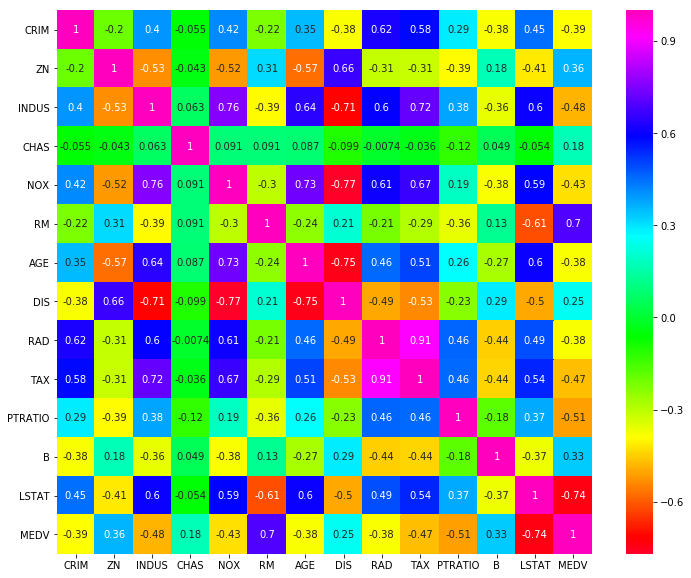

In [129]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="gist_rainbow")
plt.show()

In [130]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [131]:
print(df[["RM","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())
print(df[["PTRATIO","LSTAT"]].corr())

               RM   PTRATIO
RM       1.000000 -0.355501
PTRATIO -0.355501  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000
          PTRATIO     LSTAT
PTRATIO  1.000000  0.374044
LSTAT    0.374044  1.000000


In [132]:
#Backward elimination :
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()

In [133]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 21 Sep 2019   Prob (F-statistic):          6.95e-135
Time:                        17:14:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
#Backward Elimination from wrapper method 
cols = list(X.columns) #[]
pmax = 1
while(len(cols)>0):
    p=[]
    X_1=X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols) 
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
            break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [135]:
model = LinearRegression()

In [136]:
#Initializing RFE model
rfe = RFE(model, 11) #RANKING

In [137]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)

In [138]:
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True  True  True False
  True]
[1 1 1 1 1 1 3 1 1 1 1 2 1]


In [139]:
#Backward elimination using all the columns
nof_list=np.arange(1,13) 

In [140]:
high_score=0  #counters

In [141]:
#Variable to store the optimum features
nof=0 

In [142]:
score_list =[]

In [143]:
for n in range(len(nof_list)):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                                  random_state=0)

In [144]:
model = LinearRegression()

In [145]:
rfe = RFE(model,nof_list[n])

In [146]:
X_train_rfe = rfe.fit_transform(X_train,y_train)

In [147]:
X_test_rfe = rfe.transform(X_test)

In [148]:
model.fit(X_train_rfe,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
score = model.score(X_test_rfe,y_test)

In [150]:
score_list.append(score)

In [151]:
if(score>high_score):
    high_score = score
    nof = nof_list[n]

In [152]:
print("Optimum number of features: %d" %nof)

Optimum number of features: 12


In [153]:
print("Score with %d features: %f" % (nof, high_score))

Score with 12 features: 0.589656


In [154]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [155]:
#Embedded method : Regularisation method, LASSO or penalisation. 

In [161]:
from sklearn.linear_model import  LassoCV, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702390


In [162]:
print("Lasso picked " + str(sum(coef != 0)) 
      + " variables and eliminated the other " + 
      str(sum(coef == 0)) + " variables") 

Lasso picked 10 variables and eliminated the other 3 variables


In [158]:
imp_coef = coef.sort_values()

In [159]:
import matplotlib

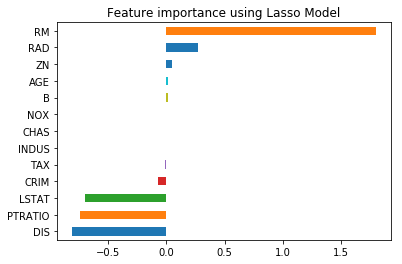

In [164]:
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.savefig("/Users/nilesh/Desktop/fsm.png")